In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from gaussian_kde import gaussian_kde
from utility import display_components, display_pca_data, weighted_kde

In [4]:
dataset_name = "W13_comb"

In [5]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (68625, 5150)
BES_numeric (68625, 4969)
var_type (5150, 13)
BES_non_numeric (68625, 126)
BES_reduced (68625, 2572)
BES_reduced_with_na (68625, 2572)
Wall time: 17min 20s


In [6]:
# Two basic problems with BES dataset
# (1) It's *big* 2,500 features to 65,000 observations (once you've dummied the categorical variables)
# (2) It's got a lot of missing values

In [7]:
# (1) Feature selection algorithms
# XGBoost - does this automatically
# Boruta: https://github.com/scikit-learn-contrib/boruta_py
# http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/


# Supervised PCA: http://thedatascientist.com/supervised-pca-practical-algorithm-datasets-lots-features/

In [8]:
# (2a) Missing values classifiers
# 
# https://www.quora.com/Which-R-or-Python-packages-or-models-can-train-on-missing-values
# classifiers that are okayish with NaNs
# XGBoost: https://machinelearningmastery.com/xgboost-python-mini-course/
# RPart: https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf
# But if you're going that route, consider using Stan to fit the ML imputation simultaneously with your regression as a single Bayesian model, since LASSO is a special case of Bayesian regression anyway.
# PyStan: https://pystan.readthedocs.io/en/latest/


# (2b)
# impute the missing values (in a manner better than mean/median/mode imputation)
# missForest http://stat.ethz.ch/education/semesters/ss2012/ams/paper/missForest_1.2.pdf
# MICE ? missForest looks better
# python implementation of missForest? https://github.com/log0ymxm/predictive_imputer

In [9]:
# visualise decision trees in python:
# https://stackoverflow.com/questions/30903226/what-is-the-equivalent-to-rpart-plot-in-python-i-want-to-visualize-the-results

In [ ]:
# Feature selection rests on analyzing feature importance
# standard measures have problems with either/both of (i) consistency and (ii) accuracy
# https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27
# https://github.com/slundberg/shap





In [303]:
# https://pypi.org/project/Boruta/
pan_dataset_values

,id,genImmigSentiment,raw_gen_lr_vals,raw_gen_al_vals,xt_std_lr,xt_std_al,lr_uniform,al_uniform
0,1,-5.634921e-03,6.900376e-03,0.005395,2.117757,1.604609,38,37
1,2,1.292237e-03,-1.050577e-02,-0.003629,-2.362559,-1.005104,0,5
2,3,3.044696e-03,1.115928e-03,0.001943,0.225521,0.462197,26,29
3,4,1.697289e-04,9.055993e-05,0.001235,-0.061444,0.251536,17,25
4,5,-3.246632e-05,-1.446233e-03,0.000089,-0.467411,-0.073327,9,17
5,6,-1.850977e-04,6.558815e-03,0.003917,1.991847,1.090720,38,35
6,7,-4.011828e-03,5.113328e-03,0.009331,1.479848,3.177783,37,39
7,8,-1.630402e-03,-7.337246e-03,-0.007323,-1.786362,-1.770214,1,1
8,9,5.802050e-03,-4.651299e-03,-0.006405,-1.228474,-1.593498,3,2
9,10,9.092295e-04,-1.734371e-03,-0.002592,-0.540438,-0.762784,8,7


In [ ]:
# Left-Authoritarians by likeCorbyn

In [315]:
pan_dataset_values = pd.read_csv( BES_small_data_files + "pan_dataset_values.csv", encoding=encoding)

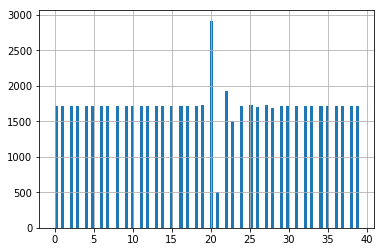

In [312]:
pan_dataset_values["al_uniform"].hist(bins=100)

In [324]:
gc.collect()

0

In [317]:
granularity = 40
pan_dataset_values["lr_uniform"] = pd.qcut( pan_dataset_values["raw_gen_lr_vals"], q=granularity, labels=range(0,granularity))
pan_dataset_values["al_uniform"] = pd.qcut( pan_dataset_values["raw_gen_al_vals"], q=granularity, labels=range(0,granularity))

In [184]:
[(x,BES_Panel[x].notnull().sum()) for x in sorted(BES_Panel.columns) if "like" in x]

[('likeAlanJohnsonW7', 30895),
 ('likeAlanJohnsonW8', 33502),
 ('likeBNPW1', 15213),
 ('likeBNPW2', 15023),
 ('likeBNPW3', 13854),
 ('likeBNPW4', 15639),
 ('likeBNPW5', 15372),
 ('likeBNPW6', 14958),
 ('likeBennettW4', 31438),
 ('likeBennettW5', 30821),
 ('likeBennettW6', 30148),
 ('likeBennettW7', 30895),
 ('likeBennettW8', 33502),
 ('likeBennettW9', 30036),
 ('likeBlairW11', 31014),
 ('likeBorisW13', 15472),
 ('likeBorisW7', 30895),
 ('likeBorisW8', 33502),
 ('likeBorisW9', 30036),
 ('likeCameronW1', 30348),
 ('likeCameronW2', 30213),
 ('likeCameronW3', 27829),
 ('likeCameronW4', 31438),
 ('likeCameronW5', 30821),
 ('likeCameronW6', 30148),
 ('likeCameronW7', 30895),
 ('likeCameronW8', 33502),
 ('likeCameronW9', 30036),
 ('likeCandAW11', 7903),
 ('likeCandBW11', 7903),
 ('likeCleggW1', 30345),
 ('likeCleggW2', 30213),
 ('likeCleggW3', 27829),
 ('likeCleggW4', 31438),
 ('likeCleggW5', 30821),
 ('likeCleggW6', 30148),
 ('likeConW1', 15225),
 ('likeConW10', 30319),
 ('likeConW11', 31014

In [325]:
pd.crosstab(index = pan_dataset_values[y_axis][mask],
            columns = pan_dataset_values[x_axis][mask],
            values = mean_like_Corbyn[mask],
            aggfunc = np.mean)

MemoryError: 

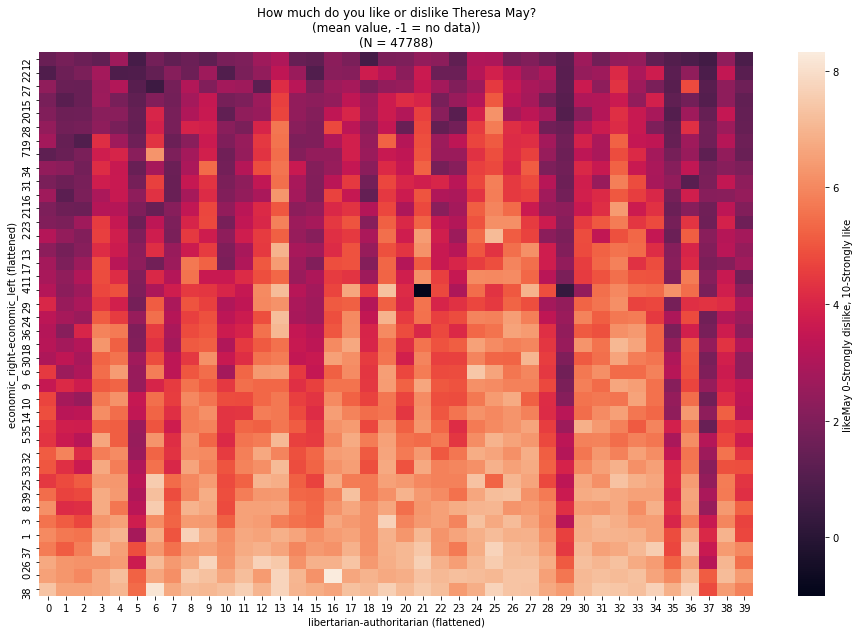

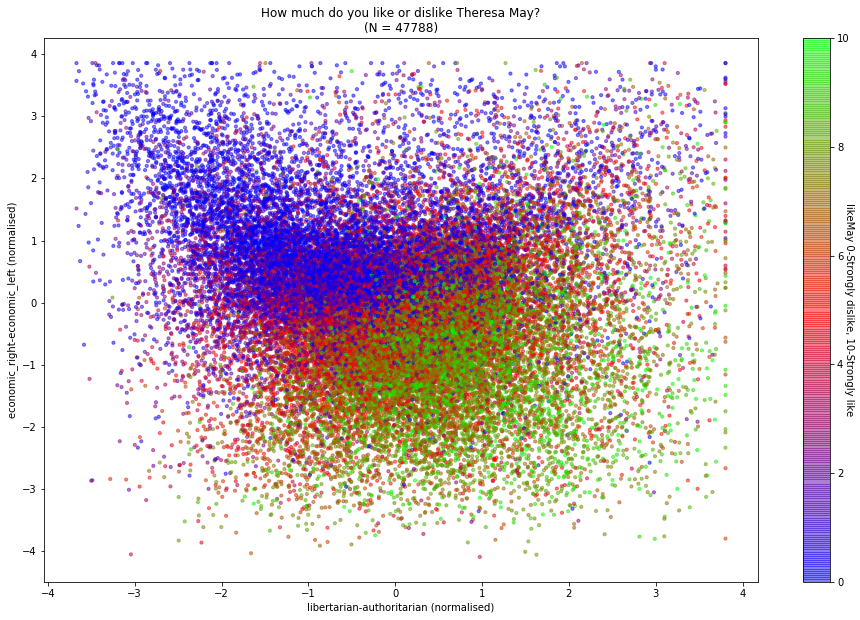

In [318]:
(like_var, like_name) = ("likeMay", "Theresa May")
(like_var, like_name) = ("likeBNP", "British National Party")
(like_var, like_name) = ("likeBennett", "Natalie Bennett")
(like_var, like_name) = ("likeBlair", "Tony Blair")
(like_var, like_name) = ("likeBoris", "Boris Johnson")
(like_var, like_name) = ("likeCameron", "David Cameron")
(like_var, like_name) = ("likeClegg", "Nick Clegg")
(like_var, like_name) = ("likeCon", "The Conservative Party")
(like_var, like_name) = ("likeDavis", "David Davis")
(like_var, like_name) = ("likeFarage", "Nigel Farage")
(like_var, like_name) = ("likeFarron", "Tim Farron")
(like_var, like_name) = ("likeJarvis", "Dan Jarvis")
(like_var, like_name) = ("likeLD", "The Liberal Democrats")
(like_var, like_name) = ("likeLab", "The Labour Party")
(like_var, like_name) = ("likeLucas", "Caroline Lucas")
(like_var, like_name) = ("likeMcDonnell", "John McDonnell")
(like_var, like_name) = ("likeMiliband", "Ed Miliband")
(like_var, like_name) = ("likeNuttall", "Paul Nuttall")
(like_var, like_name) = ("likeOsborne", "George Osborne")
# (like_var, like_name) = ("likePC", "Plaid Cymru")
(like_var, like_name) = ("likeRudd", "Amber Rudd")
(like_var, like_name) = ("likeSEvans", "Suzanne Evans")
(like_var, like_name) = ("likeSNP", "The Scottish Nationalist Party")
# (like_var, like_name) = ("likeSalmond", "Alex Salmond")
(like_var, like_name) = ("likeSturgeon", "Nicola Sturgeon")
(like_var, like_name) = ("likeUKIP", "The UK Independence Party")
(like_var, like_name) = ("likeWatson", "Tom Watson")
(like_var, like_name) = ("likeWood", "Leanne Wood")
#
(like_var, like_name) = ("euPriorityBalance", "euPriorityBalance")
(like_var, like_name) = ("immigSelf", "immigSelf")
(like_var, like_name) = ("likeCorbyn", "Jeremy Corbyn")
(like_var, like_name) = ("likeMay", "Theresa May")

x_axis = "al_uniform"
y_axis = "lr_uniform"


mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
.replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
mask = mean_like_Corbyn.notnull()

likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_values[y_axis][mask],
            columns = pan_dataset_values[x_axis][mask],
            values = mean_like_Corbyn[mask],
            aggfunc = np.mean)

plt.figure(figsize = (16,10))
ax = sns.heatmap(data = likeCorbyn_heatmap.replace(np.nan,-1),
            cbar_kws={'label': like_var+ ' 0-Strongly dislike, 10-Strongly like'})
ax.invert_yaxis()
# plt.colorbar(points);
plt.xlabel("libertarian-authoritarian (flattened)");
plt.ylabel("economic_right-economic_left (flattened)");
plt.title("How much do you like or dislike "+like_name+"?\n(mean value, -1 = no data))\n(N = "+str(mask.sum())+")")
plt.savefig(BES_output_folder + "likeCorbyn_byvalues_overtime" + os.sep + like_var +"_by_allr_heatmap" + ".png")

mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
.replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
mask = mean_like_Corbyn.notnull()

x_axis = "xt_std_al"
y_axis = "xt_std_lr"

corbynLike_by_values = pan_dataset_values[[y_axis,x_axis]][mask]
corbynLike_by_values[like_var] = mean_like_Corbyn[mask]

plt.figure(figsize = (16,10))
points = plt.scatter(data = corbynLike_by_values, x = x_axis, y = y_axis, c = like_var,
                     cmap="brg", alpha=.5, s=10)
cbar = plt.colorbar(points);
cbar.set_label(like_var+' 0-Strongly dislike, 10-Strongly like', rotation=270)
plt.xlabel("libertarian-authoritarian (normalised)");
plt.ylabel("economic_right-economic_left (normalised)");
plt.title("How much do you like or dislike "+like_name+"?\n(N = "+str(mask.sum())+")")
plt.savefig(BES_output_folder + "likeCorbyn_byvalues_overtime" + os.sep + like_name+"_by_allr_scatter" + ".png") 

In [ ]:
#### What about dimensions other than those two (e.g. immigration sentiment?)

### what about variables other than likeX?

In [11]:
## Support for different types of immigration

In [12]:
wave_dates = BES_file_manifest[ BES_file_manifest["Only_or_Combined"] == "Only" ][["Wave No","Date_Start"]]
wave_dates["Wave No"] = wave_dates["Wave No"].apply(lambda x: "W"+str(x))
wave_dates = wave_dates.set_index("Wave No")
# Corbyn_over_time_sns["likeCorbyn"] = Corbyn_over_time_sns["likeCorbyn"].apply(lambda x: wave_dates.loc[x].values[0])

In [13]:
stacked = BES_reduced_with_na[[x for x in BES_reduced.columns if re.search("[^_]More", x)]].stack()
stacked = stacked.reset_index().drop("level_0",axis=1)
stacked["wave"] = [re.search("More(W\d+)__"   ,x).groups(0)[0] for x in stacked["level_1"]]
stacked["type"] = [re.search("([a-zA-Z]+)More"   ,x).groups(0)[0] for x in stacked["level_1"]]
stacked = stacked.drop("level_1",axis=1)
stacked.columns = ['preference', 'wave', 'type']

stacked["wave"] = stacked["wave"].apply(lambda x: wave_dates.loc[x].values[0])

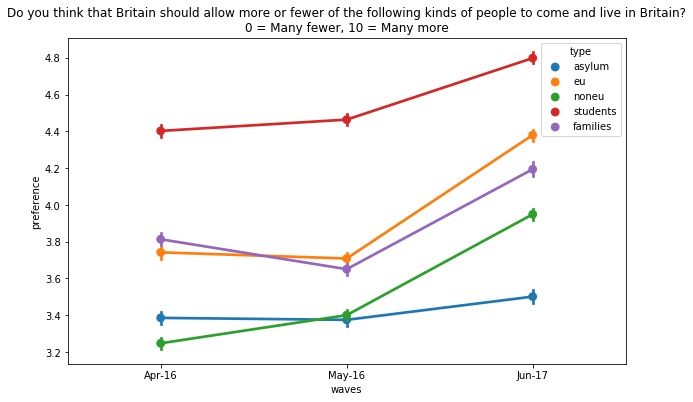

In [14]:
plt.figure(figsize=(10,6))
sns.pointplot(data=stacked, x= 'wave', y='preference', hue='type');
plt.title("Do you think that Britain should allow more or fewer of the following kinds of people to come and live in Britain?"\
         +"\n0 = Many fewer, 10 = Many more")
plt.xlabel("waves");
plt.savefig(BES_output_folder + "W13_comb_imm_corr" + os.sep + "immigMoreLessPrefByType" + ".png");

In [15]:
## Install xgboost: http://xgboost.readthedocs.io/en/latest/build.html
#


# Can't get easy CUDA install with AMD Radeon - theoretically can use GPUOcelot
# https://github.com/gtcasl/gpuocelot/wiki/Installation

In [16]:
## then : https://machinelearningmastery.com/xgboost-python-mini-course/

In [6]:
def get_base(im_var, waves=None, noNans = False):

    if waves:
        wave_list = waves
    else:
        wave_list = [x.replace(im_var,"") for x in BES_Panel.columns if re.match(im_var+"W\d",  x)]
        
    immig_vars = [im_var+x for x in wave_list]
    if noNans:
        all_in_dataset = BES_Panel[immig_vars].notnull().all(axis=1)

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars][all_in_dataset]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
    else:
        all_in_dataset = BES_Panel[immig_vars].isnull()
        
        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
        
        BES_immig[all_in_dataset] = np.nan
        all_in_dataset = ~all_in_dataset
        
        
    return BES_immig, all_in_dataset

In [10]:
imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "effectsEUImmigration", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
             "ukCoopMovement"]

In [11]:
# im_var = "immigCultural"

num = 0
for im_var in imvar_list:
    immig, mask = get_base(im_var,noNans = False)
    immig.columns = ["Delta_"+x for x in immig.columns]
    if num ==0:
        immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
    else:
        immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1


In [20]:
# add both together
im_var = "immigEcon"
immig_econ,mask = get_base(im_var,waves=["W8"],noNans = False)
mask = (immig_econ < immig_econ.median())[im_var+"W8"]
mask = (mask & immigDiff["Delta_immigSelfW10"].notnull() & immigDiff["Delta_controlImmigW9"].notnull())

BES_immigEcon = pd.concat( [BES_reduced[mask],immigDiff[[x for x in immigDiff.columns if "W10" in x]][mask]], axis=1)
BES_immigEcon = BES_immigEcon.drop(["Delta_changeImmigLabW10"],axis=1, errors='ignore')
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigEcon" in x], axis=1)
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigCultural" in x], axis=1)
BES_immigEcon["Delta_controlImmigW9"] = immigDiff["Delta_controlImmigW9"][mask]
# BES_immigEcon = BES_immigEcon[var_list]


target = immigDiff["Delta_immigEconW10"][mask] + immigDiff["Delta_immigCulturalW10"][mask]

In [21]:
# BES_Panel["immigEconW10"].cat.categories

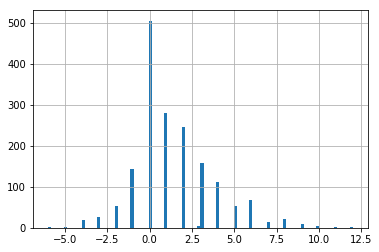

In [22]:
(6*target).hist(bins=100)
new_target = (6*target).copy()
reduced = (new_target<-0.5)
same = (new_target >-.5) & (new_target <.5)
increased = (new_target >.5)
new_target[reduced] = "reduced"
new_target[same] = "same"
new_target[increased] = "increased"
new_target = new_target.astype('category')

In [23]:
new_target = round(6*target).apply(lambda x: min(x,10))
new_target = new_target.astype('category')

In [24]:
new_target.shape

(1721,)

In [48]:
%%time
## try Boruta
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
# X = pd.read_csv('examples/test_X.csv', index_col=0).values
X = BES_immigEcon.values
# y = pd.read_csv('examples/test_y.csv', header=None, index_col=0).values
# y = new_target.values
y = target.values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, perc=99)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

BES_immigEcon.columns[ feat_selector.support_ ]

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	2560
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	143
Rejected: 	2417


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	66
Tentative: 	77
Rejected: 	2417


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	66
Tentative: 	77
Rejected: 	2417


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	66
Tentative: 	77
Rejected: 	2417


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	66
Tentative: 	57
Rejected: 	2437


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	66
Tentative: 	57
Rejected: 	2437


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	66
Tentative: 	57
Rejected: 	2437


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	66
Tentative: 	57
Rejected: 	2437


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	66
Tentative: 	44
Rejected: 	2450


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	66
Tentative: 	44
Rejected: 	2450


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	66
Tentative: 	44
Rejected: 	2450


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	66
Tentative: 	38
Rejected: 	2456


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	66
Tentative: 	38
Rejected: 	2456


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	66
Tentative: 	38
Rejected: 	2456


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	66
Tentative: 	32
Rejected: 	2462


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	66
Tentative: 	32
Rejected: 	2462


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	66
Tentative: 	32
Rejected: 	2462


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	66
Tentative: 	32
Rejected: 	2462


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	66
Tentative: 	32
Rejected: 	2462


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	66
Tentative: 	30
Rejected: 	2464


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	66
Tentative: 	30
Rejected: 	2464


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	66
Tentative: 	30
Rejected: 	2464


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	66
Tentative: 	28
Rejected: 	2466


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	66
Tentative: 	28
Rejected: 	2466


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	66
Tentative: 	23
Rejected: 	2471


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	66
Tentative: 	23
Rejected: 	2471


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	66
Tentative: 	19
Rejected: 	2475


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	66
Tentative: 	19
Rejected: 	2475


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	66
Tentative: 	19
Rejected: 	2475


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	66
Tentative: 	19
Rejected: 	2475


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	66
Tentative: 	18
Rejected: 	2476


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	66
Tentative: 	18
Rejected: 	2476


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	66
Tentative: 	15
Rejected: 	2479


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	66
Tentative: 	15
Rejected: 	2479


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	66
Tentative: 	15
Rejected: 	2479


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	66
Tentative: 	13
Rejected: 	2481


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	66
Tentative: 	13
Rejected: 	2481


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	66
Tentative: 	13
Rejected: 	2481


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	66
Tentative: 	12
Rejected: 	2482


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	66
Tentative: 	12
Rejected: 	2482


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	66
Tentative: 	12
Rejected: 	2482


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	66
Tentative: 	12
Rejected: 	2482


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	66
Tentative: 	12
Rejected: 	2482


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	66
Tentative: 	11
Rejected: 	2483


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	66
Tentative: 	11
Rejected: 	2483


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	66
Tentative: 	11
Rejected: 	2483


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	66
Tentative: 	9
Rejected: 	2485


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486
Iteration: 	71 / 100
Confirmed: 	66
Tentative: 	8
Rejected: 	2486


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	66
Tentative: 	7
Rejected: 	2487


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489
Iteration: 	99 / 100
Confirmed: 	66
Tentative: 	5
Rejected: 	2489


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	66
Tentative: 	1
Rejected: 	2489


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Index(['generalElectionCertaintyW5__Completely certain', 'leftRightW6__Right',
       'europeannessW7__Very strongly European',
       'trustMPsW7__A great deal of trust', 'benefitsToMigrantsW7__Never',
       'effectsEUTerrorW7__Much higher', 'leftRightW7__Right',
       'familiesMoreW7__Many more', 'immigSelfW7__Allow many more',
       'labUnitedW7__Very united', 'euRefCertaintyW8__Completely certain',
       'euRefExpectationW8__100 - UK will definitely vote to leave the EU',
       'likeConW8__Strongly like', 'likeUKIPW8__Strongly like',
       'changeCostLiveW8__Getting a lot higher',
       'EUIntegrationConW8__Protect our independence',
       'effectsEUUnemploymentW8__Much higher',
       'britainFairShareW8__Much more than its fair share',
       'euMemberJoinW8__Strongly agree',
       'socialIdentityGlobalLeaveW8__A great deal in common',
       'asylumMoreW8__Many more', 'euMoreW8__Many more',
       'noneuMoreW8__Many more', 'studentsMoreW8__Many more',
       'familiesMo

In [64]:
BES_immigEcon.columns[ feat_selector.support_ ]

Index(['generalElectionCertaintyW5__Completely certain', 'leftRightW6__Right',
       'europeannessW7__Very strongly European',
       'trustMPsW7__A great deal of trust', 'benefitsToMigrantsW7__Never',
       'effectsEUTerrorW7__Much higher', 'leftRightW7__Right',
       'familiesMoreW7__Many more', 'immigSelfW7__Allow many more',
       'labUnitedW7__Very united', 'euRefCertaintyW8__Completely certain',
       'euRefExpectationW8__100 - UK will definitely vote to leave the EU',
       'likeConW8__Strongly like', 'likeUKIPW8__Strongly like',
       'changeCostLiveW8__Getting a lot higher',
       'EUIntegrationConW8__Protect our independence',
       'effectsEUUnemploymentW8__Much higher',
       'britainFairShareW8__Much more than its fair share',
       'euMemberJoinW8__Strongly agree',
       'socialIdentityGlobalLeaveW8__A great deal in common',
       'asylumMoreW8__Many more', 'euMoreW8__Many more',
       'noneuMoreW8__Many more', 'studentsMoreW8__Many more',
       'familiesMo

In [188]:
%%time
import statsmodels.api as sm
X = BES_immigEcon[BES_immigEcon.columns[ feat_selector.support_ ]].copy()
clean_feature_set_std = StandardScaler().fit_transform(X.values )
X = pd.DataFrame(clean_feature_set_std,
                 columns = X.columns,
                 index   = X.index      )

X = sm.add_constant(X)
# y = (target-target.mean())/target.std()
y = new_target.cat.codes
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'feat_selector' is not defined

In [70]:
results = model.fit_regularized(alpha=0.03,L1_wt=.3, profile_scale=False)
pd.DataFrame( [X.columns, results.params] ).T.sort_values(by=1).replace(0,np.nan).dropna()

,0,1
33,ukCoopMovementW10__Bad for Britain,-0.351181
22,euMoreW8__Many more,-0.265928
26,immigSelfW8__Allow many more,-0.231347
65,Delta_immigrantsWelfareStateW10,-0.185314
13,likeConW8__Strongly like,-0.161189
52,euPriorityBalanceW12__Control immigration,-0.122780
39,changeImmigW10__Getting a lot higher,-0.121708
9,immigSelfW7__Allow many more,-0.104354
5,benefitsToMigrantsW7__Never,-0.098795
10,labUnitedW7__Very united,-0.092323


In [ ]:
# weird features
# leftRightW6__Right                                                    0.1530 ???
# participation_3W5_Yes                                                 0.1637
# benefitsToMigrantsW7__Never                                          -0.1120

In [ ]:
## clean this data up a bit

# add some variables to imvar_list
## europeanness, trustMPs, overseasAid, satDemUK, satDemEU, satDemEng, happyEULeave, beliefTradeoff
# effectsEUEcon, effectsEUFinance, effectsEUImmigration, effectsEUNHS,
# effectsEUTerror, effectsEUTrade, effectsEUUnemployment, effectsEUWorkers 


In [7]:
imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "ukCoopMovement", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
             "europeanness", "trustMPs", "overseasAid", "beliefTradeoff",
             "satDemUK", "satDemEU", "satDemEng", "happyEULeave",
             "effectsEUEcon", "effectsEUFinance", "effectsEUImmigration", "effectsEUNHS",
             "effectsEUTerror", "effectsEUTrade", "effectsEUUnemployment", "effectsEUWorkers", 
             ]


# "effectsEUImmigration"

In [8]:
# im_var = "immigCultural"

num = 0
for im_var in imvar_list:
    immig, mask = get_base(im_var,noNans = False)
    immig.columns = ["Delta_"+x for x in immig.columns]
    if num ==0:
        immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
    else:
        immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1


In [9]:
# drop everything after W10
immigDiff = immigDiff.drop([x for x in immigDiff.columns if ("W11" in x)|("W12" in x)|("W13" in x)],axis=1)

In [10]:
# add both together
im_var = "immigEcon"
immig_econ,mask = get_base(im_var,waves=["W8"],noNans = False)
mask = (immig_econ < immig_econ.median())[im_var+"W8"]
mask = (mask & immigDiff["Delta_immigEconW10"].notnull()& immigDiff["Delta_immigCulturalW10"].notnull())
# mask = (mask & immigDiff["Delta_immigSelfW10"].notnull() & immigDiff["Delta_controlImmigW9"].notnull())

# BES_immigEcon = pd.concat( [ BES_reduced_with_na[mask],
#                              immigDiff[[x for x in immigDiff.columns if "W10" in x]][mask] ], axis=1)
BES_immigEcon = pd.concat( [ BES_reduced_with_na[mask],
                             immigDiff[mask] ], axis=1)
# BES_immigEcon = BES_immigEcon.drop(["Delta_changeImmigLabW10"],axis=1, errors='ignore')
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigEcon" in x], axis=1)
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigCultural" in x], axis=1)
# BES_immigEcon["Delta_controlImmigW9"] = immigDiff["Delta_controlImmigW9"][mask]
# BES_immigEcon = BES_immigEcon[var_list]


target = immigDiff["Delta_immigEconW10"][mask] + immigDiff["Delta_immigCulturalW10"][mask]
rounded_targets = round(target*6).apply(lambda x: min(x,10)).apply(lambda x: max(x,-4))
rounded_targets = rounded_targets.astype('float')
rounded_targets.value_counts()

 0.0     2385
 1.0     1204
 2.0     1170
 3.0      766
-1.0      571
 4.0      508
 6.0      301
-2.0      291
 5.0      254
-3.0      110
-4.0       74
 7.0       68
 8.0       62
 10.0      52
 9.0       35
dtype: int64

In [11]:
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if ("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

In [56]:
BES_immigEcon = BES_immigEcon.drop(BES_immigEcon.columns[BES_immigEcon.var()==0], axis=1)

In [55]:
# # split data into X and y
# X = BES_immigEcon.values
# Y = rounded_targets.values
# rounded_targets.isnull().sum()

In [12]:
# del xgboost
xgb_dir = "C:\\Users\\Marios\\AppData\\Local\\conda\\conda\\envs\\BES_analysis\\Lib\\site-packages\\xgboost"
import sys, os
sys.path.append(xgb_dir)
from xgboost import XGBClassifier, XGBRegressor, DMatrix, cv, plot_tree
import xgboost as xgb

In [13]:
# First XGBoost model for Pima Indians dataset
import graphviz
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [31]:
# `booster=”gblinear”`, `objective=”reg:linear”

In [379]:

# train_test_split(BES_immigEcon, rounded_targets, test_size=test_size, random_state=seed, stratify=Y)


In [99]:
%%time
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(BES_immigEcon, rounded_targets, test_size=test_size,
                                                    random_state=seed, stratify=rounded_targets)
# fit model on training data

# alg = XGBRegressor(max_depth=3, learning_rate=0.04, n_estimators=500, silent=False,
#                    objective='reg:linear', booster='gbtree', n_jobs=1,
#                    gamma=0.0, min_child_weight=5, max_delta_step=0, subsample=1.0,
#                    colsample_bytree=1.0, colsample_bylevel=1, reg_alpha=0, reg_lambda=1.0,
#                    scale_pos_weight=1, base_score=0.5, random_state=0,
#                    )

alg = XGBRegressor(
 learning_rate =0.04, #0.04
 n_estimators= 500,   #180,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 seed=27)

# booster='gblinear': 2.59s Acc 17.61 
# booster='gbtree': 7.86s Acc 18.49 
# learning rate =0.04 -> better 19%
# max_depth = 5: Accuracy: 22.01%, Wall time: 12.7 s
# gamma=0 = .2: Accuracy: 22.01%, Wall time: 12.8 s NO EFFECt
# subsample=.8, colsample_bytree=.8: Accuracy: 20.25%, Wall time: 11.1 s
# subsample=.9, colsample_bytree=.9: Accuracy: 20.25%, Wall time: 12.3 s
# subsample=.9, colsample_bytree=1.0: Accuracy: 20.07%, Wall time: 13 s
# subsample=.5, colsample_bytree=0.5: Accuracy: 19.72%, Wall time: 8.33 s
# n_estimators=1000: Accuracy: 21.65%, Wall time: 2min 3s
# reg_alpha=1e-5: Accuracy: 22.01%, Wall time: 12.5 s
# reg_alpha=100: Accuracy: 18.13%, Wall time: 12.6 s
# reg_alpha=.1: Accuracy: 20.95%, Wall time: 12.5 s
# reg_lambda=0: Accuracy: 19.19%, Wall time: 12.3 s
# reg_lambda=.01: Accuracy: 20.25%, Wall time: 12.9 s
# reg_lambda=100: Accuracy: 21.13%, Wall time: 12.4 s
# MSE: 4.51, MAE: 1.55, EV: 0.16, R2: 0.16
# MSE: 4.44, MAE: 1.58, EV: 0.17, R2: 0.17
# reg_alpha=.5; MSE: 4.43, MAE: 1.57, EV: 0.17, R2: 0.17
# reg_alpha=100; MSE: 4.43, MAE: 1.57, EV: 0.17, R2: 0.17
# reg_alpha=100, reg_lambda=0.5; MSE: 4.43, MAE: 1.57, EV: 0.17, R2: 0.17
# MSE: 4.41, MAE: 1.57, EV: 0.18, R2: 0.18

eval_set = [(X_test, y_test)]
alg.fit(X_train, y_train)
        #, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = alg.predict(X_test)
# predictions = [round(value) for value in y_pred]
predictions = y_pred
# evaluate predictions
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
EV = explained_variance_score(y_test, predictions)
R2 = r2_score(y_test, predictions)

print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )



MSE: 4.41, MAE: 1.57, EV: 0.18, R2: 0.18
Wall time: 2min 32s


In [25]:
%%time
import shap
shap.initjs()

model = XGBRegressor(
 learning_rate =0.04, #0.04
 n_estimators= 500,   #180,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 seed=27)

# train XGBoost model
# X,y = shap.datasets.boston()
# model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
model.fit(BES_immigEcon, rounded_targets)

Wall time: 3min 9s


In [51]:
model=alg

In [57]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
shap_values = shap.TreeExplainer(model).shap_values(BES_immigEcon)

In [107]:
# visualize the first prediction's explanation
shap.force_plot(shap_values[0,:], BES_immigEcon.iloc[0,:])

In [33]:
?shap.summary_plot

In [125]:
# visualize the training set predictions
subsample = np.random.rand(BES_immigEcon.shape[0])<(10/100)
# shap.force_plot(shap_values[subsample], BES_immigEcon[subsample])

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


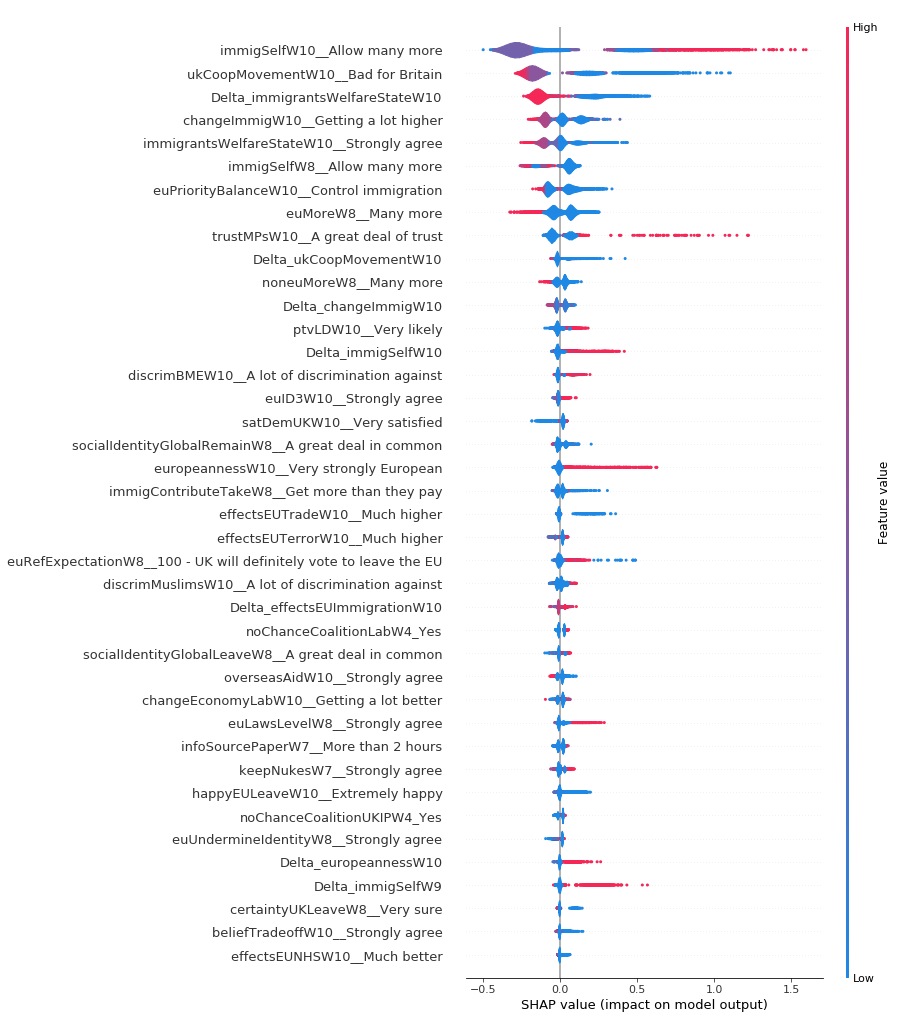

In [84]:
# BES_immigEcon.loc[:,subsample]
# max_display
shap.summary_plot(shap_values, BES_immigEcon, max_display=40, plot_type='violin')


In [61]:
# summarize the effects of all the features
# shap.summary_plot(shap_values, BES_immigEcon)

In [82]:
[x for x in BES_reduced.columns if "immigContribute" in x]

['immigContributeTakeW7__Get more than they pay',
 'immigContributeTakeW8__Get more than they pay']

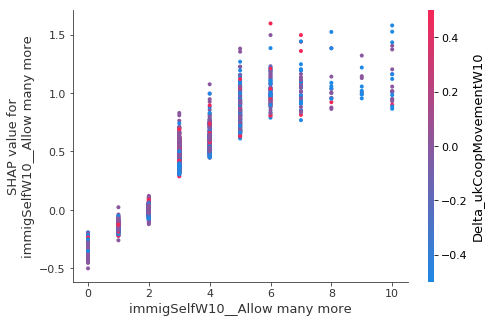

In [63]:
shap.dependence_plot("immigSelfW10__Allow many more", shap_values, BES_immigEcon)

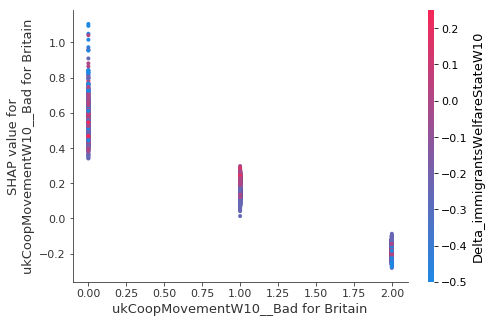

In [64]:
shap.dependence_plot("ukCoopMovementW10__Bad for Britain", shap_values, BES_immigEcon)

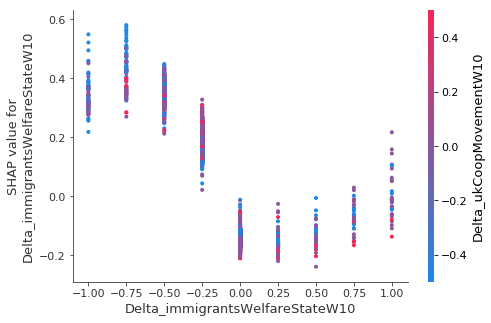

In [65]:
shap.dependence_plot("Delta_immigrantsWelfareStateW10", shap_values, BES_immigEcon)

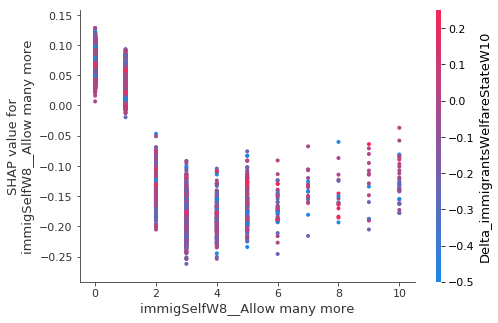

In [66]:
shap.dependence_plot("immigSelfW8__Allow many more", shap_values, BES_immigEcon)

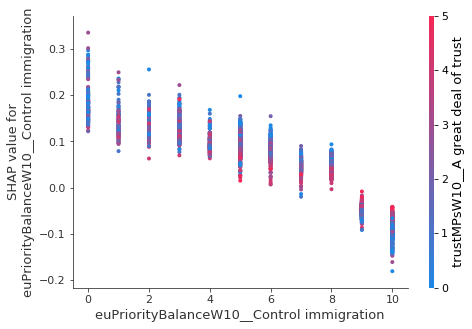

In [67]:
shap.dependence_plot("euPriorityBalanceW10__Control immigration", shap_values, BES_immigEcon)

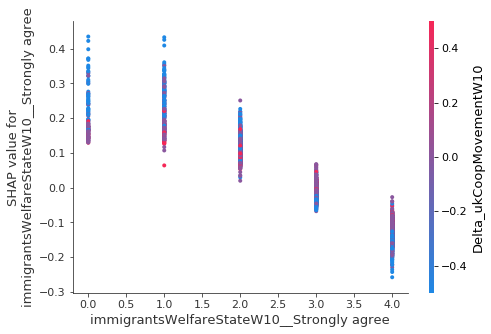

In [68]:
shap.dependence_plot("immigrantsWelfareStateW10__Strongly agree", shap_values, BES_immigEcon)

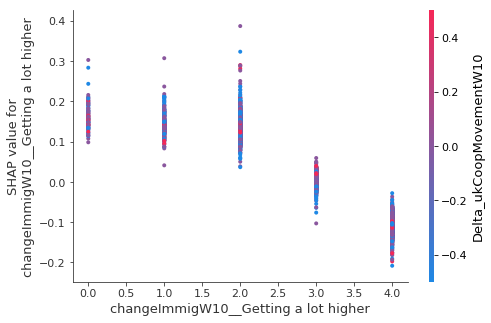

In [69]:
shap.dependence_plot("changeImmigW10__Getting a lot higher", shap_values, BES_immigEcon)

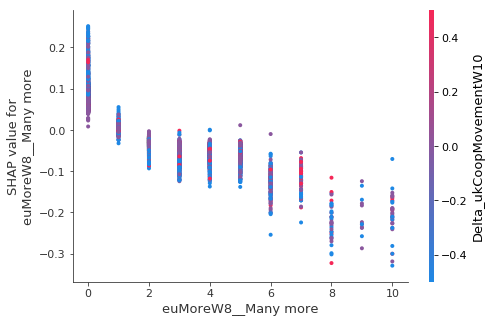

In [70]:
shap.dependence_plot("euMoreW8__Many more", shap_values, BES_immigEcon)

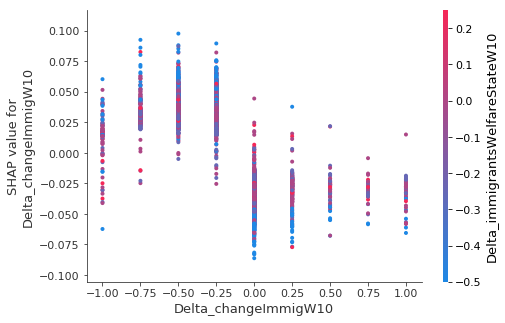

In [71]:
shap.dependence_plot("Delta_changeImmigW10", shap_values, BES_immigEcon)

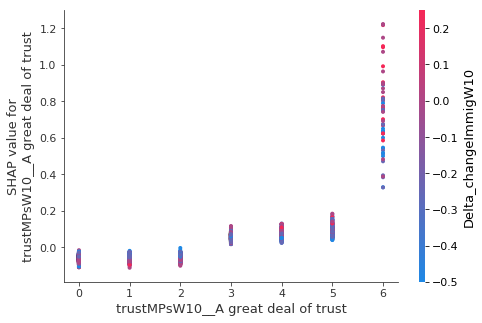

In [72]:
shap.dependence_plot("trustMPsW10__A great deal of trust", shap_values, BES_immigEcon)

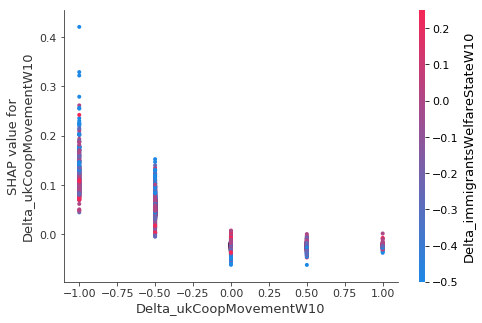

In [73]:
shap.dependence_plot("Delta_ukCoopMovementW10", shap_values, BES_immigEcon)

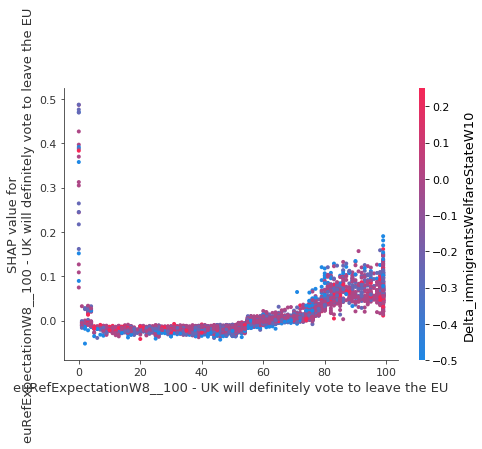

In [74]:
shap.dependence_plot("euRefExpectationW8__100 - UK will definitely vote to leave the EU", shap_values, BES_immigEcon)

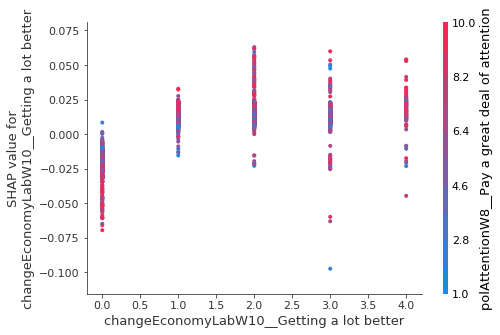

In [75]:
shap.dependence_plot('changeEconomyLabW10__Getting a lot better', shap_values, BES_immigEcon)

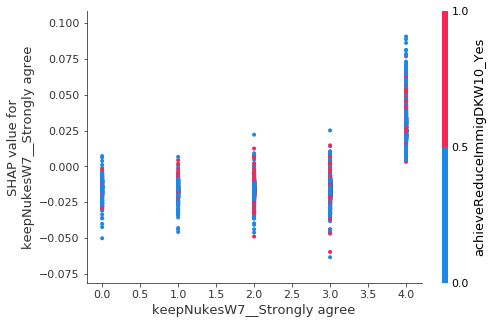

In [76]:
shap.dependence_plot('keepNukesW7__Strongly agree', shap_values, BES_immigEcon)

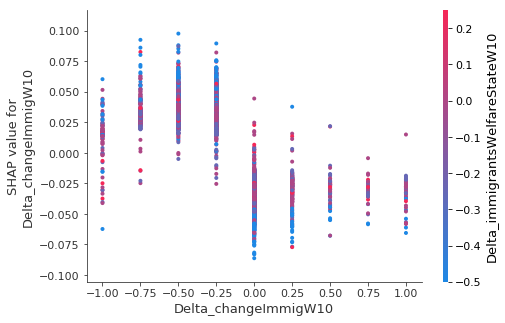

In [78]:
shap.dependence_plot('Delta_changeImmigW10', shap_values, BES_immigEcon)

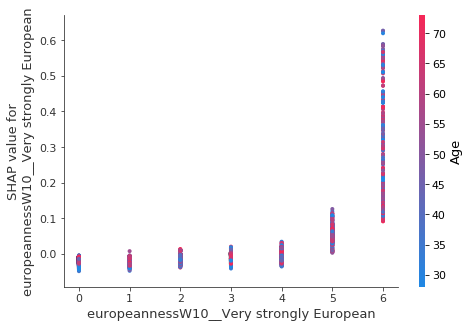

In [80]:
# 'europeannessW10__Very strongly European'
shap.dependence_plot('europeannessW10__Very strongly European', shap_values, BES_immigEcon)

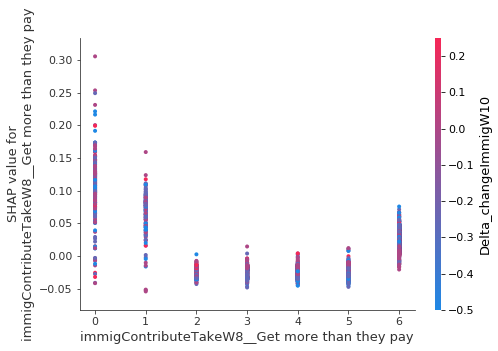

In [83]:
# 'europeannessW10__Very strongly European'
shap.dependence_plot('immigContributeTakeW8__Get more than they pay', shap_values, BES_immigEcon)

In [81]:
gc.collect()

8059

In [ ]:
# shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(BES_immigEcon.iloc[:200,:])
# crashes - looks like memory error!

In [147]:
gc.collect()

99

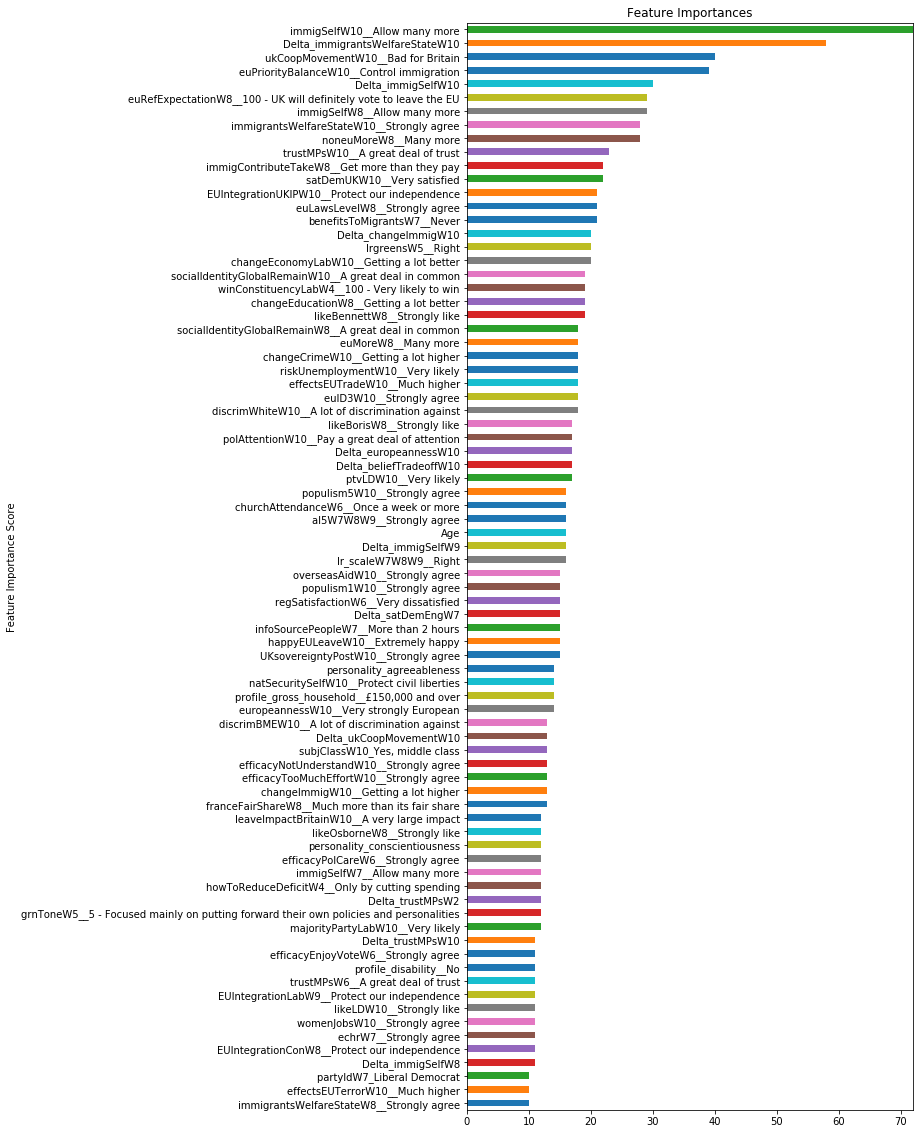

In [59]:
# comp["components_"].tail(30).plot( kind='barh', ax=comp_ax, figsize=(10,6), xlim=xlim )
num_features_to_view = 80
feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[0:num_features_to_view][::-1]
plt.figure(figsize=(8,num_features_to_view/4))
xlim = [0 , feat_imp.max() ]
feat_imp.plot(kind='barh', title='Feature Importances', xlim=xlim)
plt.ylabel('Feature Importance Score');



In [61]:
[x for x in feat_imp.index if "Delta" in x]

['Delta_immigSelfW8',
 'Delta_trustMPsW10',
 'Delta_trustMPsW2',
 'Delta_ukCoopMovementW10',
 'Delta_satDemEngW7',
 'Delta_immigSelfW9',
 'Delta_beliefTradeoffW10',
 'Delta_europeannessW10',
 'Delta_changeImmigW10',
 'Delta_immigSelfW10',
 'Delta_immigrantsWelfareStateW10']

In [14]:
import xgboost as xgb
# xgboost.cv()
# xgboost.DMatrix()

In [ ]:
# parameter tuning!

# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [15]:
from matplotlib.pylab import rcParams
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import xgboost as xgb
rcParams['figure.figsize'] = 12, 4



C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
def modelfit(alg, dtrain, predictors, target, metric, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
#         return xgtrain
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=metric, early_stopping_rounds=early_stopping_rounds, show_stdv=True, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric=metric)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    return alg, dtrain_predictions

def modeldisplay(alg, dtrain, target, dtrain_predictions):
#     plt.figure(figsize = (14,10));
    #Print model report:
    print("\nModel Report" )
    print("R^2 : %.4g" % metrics.r2_score(dtrain[target].values, dtrain_predictions ) )    
    print("Explained Variance : %.4g" % metrics.explained_variance_score(dtrain[target].values, dtrain_predictions ) )    

    # print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions) )
#     print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob) )
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[0:50]
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
    
    num_features_to_view = 80
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[0:num_features_to_view][::-1]
    plt.figure(figsize=(8,num_features_to_view/4));
    xlim = [0 , feat_imp.max() ]
    feat_imp.plot(kind='barh', title='Feature Importances', xlim=xlim);
    plt.ylabel('Feature Importance Score');
    return feat_imp

In [386]:
# BES_immigEcon[[x for x in BES_immigEcon.columns if "control" in x]].isnull().sum()

In [42]:

train = pd.concat([BES_immigEcon,rounded_targets],axis=1)
target = 0
IDcol = 'id'

#Choose all predictors except target & IDcols
drop_list = list(train.columns[train.var()==0])
# drop_list.append(target)#.append(IDcol)
predictors = [x for x in train.columns if x not in drop_list]
# predictors.append(0)
train=train[predictors]
predictors.remove(0)

xgb1 = XGBRegressor(
 learning_rate =0.04, #0.04
 n_estimators= 500,   #180,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 seed=27)


# {'colsample_bylevel': 0.9,
#  'colsample_bytree': 0.85,
#  'learning_rate': 0.04,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'scale_pos_weight': 1.0,
#  'subsample': 0.75}

# reg_alpha, reg_lamba, gamma - no effect
# mean: 0.17620, std: 0.02092, params: {'colsample_bytree': 0.9, 'subsample': 0.8},
# mean: 0.17783, std: 0.01919, params: {'colsample_bylevel': 0.9, 'colsample_bytree': 0.95, 'subsample': 0.75},
# 'colsample_bytree': 0.9, 'subsample': 0.8
# {'colsample_bylevel': 0.95, 'colsample_bytree': 0.95, 'subsample': 0.75}
metric = 'rmse'

[0]	train-rmse:2.45732+0.0124804	test-rmse:2.45805+0.052259
[1]	train-rmse:2.43607+0.0117164	test-rmse:2.43771+0.0516346
[2]	train-rmse:2.41568+0.0110275	test-rmse:2.41868+0.0519014
[3]	train-rmse:2.3965+0.0107718	test-rmse:2.40137+0.0516068
[4]	train-rmse:2.37876+0.0106168	test-rmse:2.38469+0.0510034
[5]	train-rmse:2.36239+0.0100935	test-rmse:2.36984+0.0505491
[6]	train-rmse:2.34633+0.00968201	test-rmse:2.35549+0.0507254
[7]	train-rmse:2.33151+0.00947925	test-rmse:2.3419+0.0499955
[8]	train-rmse:2.31734+0.00937663	test-rmse:2.32842+0.0493733
[9]	train-rmse:2.30432+0.00909193	test-rmse:2.31663+0.0485729
[10]	train-rmse:2.29196+0.00915215	test-rmse:2.30524+0.0480133
[11]	train-rmse:2.28031+0.00908093	test-rmse:2.29497+0.047481
[12]	train-rmse:2.26914+0.009189	test-rmse:2.28514+0.0469969
[13]	train-rmse:2.2586+0.00922955	test-rmse:2.276+0.0466887
[14]	train-rmse:2.24875+0.00931499	test-rmse:2.26759+0.0462188
[15]	train-rmse:2.23926+0.00885702	test-rmse:2.25925+0.0458662
[16]	train-rmse:2

[131]	train-rmse:1.94465+0.00803554	test-rmse:2.10379+0.029416
[132]	train-rmse:1.94345+0.00811331	test-rmse:2.1037+0.0293983
[133]	train-rmse:1.94227+0.00802962	test-rmse:2.10363+0.0293489
[134]	train-rmse:1.94098+0.00793413	test-rmse:2.10347+0.029446
[135]	train-rmse:1.93975+0.00788764	test-rmse:2.10332+0.029142
[136]	train-rmse:1.93853+0.00783873	test-rmse:2.10312+0.0288844
[137]	train-rmse:1.93727+0.00782636	test-rmse:2.10278+0.0288528
[138]	train-rmse:1.93595+0.00776039	test-rmse:2.10239+0.028976
[139]	train-rmse:1.93464+0.00770221	test-rmse:2.10208+0.0290724
[140]	train-rmse:1.93337+0.00763808	test-rmse:2.10189+0.0289122
[141]	train-rmse:1.93214+0.00773262	test-rmse:2.10161+0.029098
[142]	train-rmse:1.93075+0.00772614	test-rmse:2.10136+0.0289279
[143]	train-rmse:1.9295+0.00783776	test-rmse:2.10107+0.0287265
[144]	train-rmse:1.92823+0.0078155	test-rmse:2.10093+0.0284829
[145]	train-rmse:1.92702+0.00776691	test-rmse:2.10069+0.0284622
[146]	train-rmse:1.92589+0.00787284	test-rmse:2.

[260]	train-rmse:1.812+0.00822705	test-rmse:2.09329+0.0279671
[261]	train-rmse:1.81125+0.00819013	test-rmse:2.0933+0.0279503
[262]	train-rmse:1.81038+0.00798788	test-rmse:2.09348+0.0281583
[263]	train-rmse:1.80943+0.00794797	test-rmse:2.09344+0.0280349
[264]	train-rmse:1.80849+0.00790491	test-rmse:2.09342+0.0279921
[265]	train-rmse:1.80763+0.00790283	test-rmse:2.09366+0.0280493
[266]	train-rmse:1.80667+0.00794345	test-rmse:2.09361+0.027935
[267]	train-rmse:1.80569+0.00796326	test-rmse:2.09348+0.0278759
[268]	train-rmse:1.80485+0.00808419	test-rmse:2.09329+0.0278903
[269]	train-rmse:1.80405+0.00810743	test-rmse:2.09329+0.0277859
[270]	train-rmse:1.80309+0.00813407	test-rmse:2.09315+0.0279809
[271]	train-rmse:1.80226+0.00798683	test-rmse:2.09304+0.0281148
[272]	train-rmse:1.80134+0.00806556	test-rmse:2.09298+0.0280918
[273]	train-rmse:1.80053+0.00803236	test-rmse:2.0929+0.0280765
[274]	train-rmse:1.79966+0.00803781	test-rmse:2.09278+0.0279618
[275]	train-rmse:1.79875+0.00813297	test-rmse

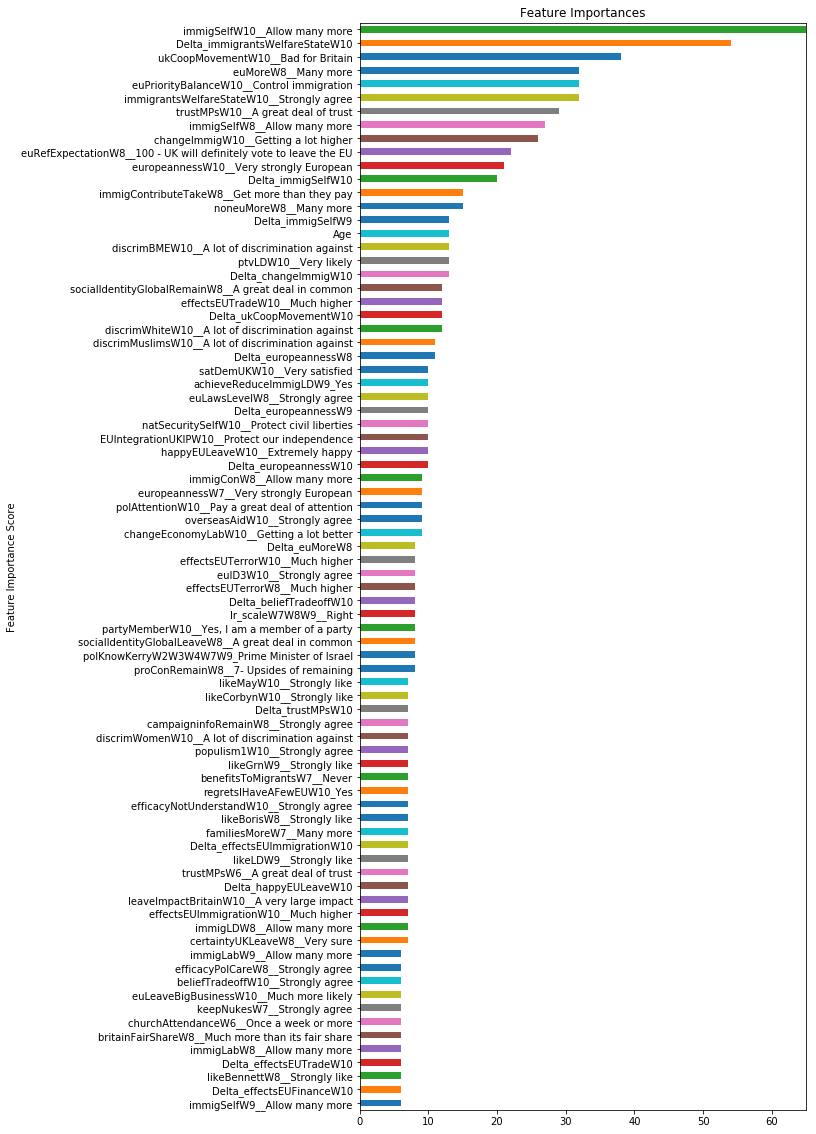

In [43]:
%%time
alg, dtrain_predictions = modelfit(xgb1, train, predictors, target, metric, useTrainCV=True)
feat_imp = modeldisplay(alg, train, target, dtrain_predictions)

 

In [48]:
sorted([x for x in BES_Panel.columns if "happyEULeave" in x])
# europeanness, trustMPs, overseasAid, satDemUK, satDemEU, satDemEng, happyEULeave, beliefTradeoff
# effectsEUEcon, effectsEUFinance, effectsEUImmigration, effectsEUNHS,
# effectsEUTerror, effectsEUTrade, effectsEUUnemployment, effectsEUWorkers 

['happyEULeaveW10', 'happyEULeaveW11', 'happyEULeaveW13', 'happyEULeaveW9']

In [19]:
%%time
param_test1 ={
     'subsample':[0.75, .8],
     'colsample_bytree':[0.9, 0.95],
     'colsample_bylevel':[0.9, 0.95]
}

gsearch1 = GridSearchCV(estimator = xgb1,
                        param_grid = param_test1,
                        scoring='r2', 
                        n_jobs=4, 
                        iid=False,
                        cv=5,
                        verbose=True)

gsearch1.fit(train[predictors],train[target])

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 15.2min finished


[mean: 0.17360, std: 0.02015, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 0.95, 'subsample': 0.65},
 mean: 0.17246, std: 0.01931, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 0.95, 'subsample': 0.75},
 mean: 0.17173, std: 0.02098, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 1.0, 'subsample': 0.65},
 mean: 0.17161, std: 0.02541, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 1.0, 'subsample': 0.75},
 mean: 0.17219, std: 0.02415, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 0.95, 'subsample': 0.65},
 mean: 0.17592, std: 0.02032, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 0.95, 'subsample': 0.75},
 mean: 0.16609, std: 0.01851, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 1.0, 'subsample': 0.65},
 mean: 0.17332, std: 0.02479, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 1.0, 'subsample': 0.75}]

{'colsample_bylevel': 0.95, 'colsample_bytree': 0.95, 'subsample': 0.75}

0.1759237428804699

Wall time: 16min 54s


In [85]:
model = XGBRegressor(
 learning_rate =0.04, #0.04
 n_estimators= 500,   #180,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 seed=27)

In [86]:
%%time
param_test1 ={
      'gamma':[0, 0.5],
      'reg_alpha':[0, 100],
      'reg_lambda':[1, 0.1],
      'scale_pos_weight':[1,.5],
      'max_depth':[2,4],
      'min_child_weight':[2]
    
     #'learning_rate':[0.042],
}

# mean: 0.17901, std: 0.02231, params: {'learning_rate': 0.04},

gsearch1 = GridSearchCV(estimator = model,
                        param_grid = param_test1,
                        scoring='r2', 
                        n_jobs=4, 
                        iid=False,
                        cv=5,
                        verbose=True)

gsearch1.fit(train[predictors],train[target])

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 21.2min
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed: 104.1min finished


[mean: 0.17598, std: 0.02185, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.70360, std: 0.05323, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17476, std: 0.02174, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.72190, std: 0.07799, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.17035, std: 0.01579, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.74581, std: 0.05697, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17083, std: 0.01632, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.74587, std: 0.05705, params: {'gamma': 0, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.17287, std: 0.02389, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.56612, std: 0.05936, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17292, std: 0.02492, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.58294, std: 0.07693, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.16925, std: 0.01816, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.69878, std: 0.07205, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.16972, std: 0.01750, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.69937, std: 0.07145, params: {'gamma': 0, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.17598, std: 0.02185, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.70310, std: 0.05340, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17460, std: 0.02181, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.72172, std: 0.07823, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.17035, std: 0.01579, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.74741, std: 0.05761, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17083, std: 0.01632, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 1},
 mean: -0.74696, std: 0.05793, params: {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 100, 'reg_lambda': 0.1, 'scale_pos_weight': 0.5},
 mean: 0.17324, std: 0.02199, params: {'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1},
 mean: -0.57571, std: 0.07853, params: {'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0.5},
 mean: 0.17469, std: 0.02823, params: {'gamma': 0.5, 'max_depth': 4, 'm

{'gamma': 0,
 'max_depth': 2,
 'min_child_weight': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

0.17597891461255552

Wall time: 1h 46min 16s


In [34]:
%%time
param_test1 ={
     'gamma':[0, 0.5],
     'reg_alpha':[0, 100],
     'reg_lambda':[1, 0.1],
     'learning_rate':[0.035, 0.04, 0.45],
}

gsearch1 = GridSearchCV(estimator = model,
                        param_grid = param_test1,
                        scoring='r2', 
                        n_jobs=4, 
                        iid=False,
                        cv=5,
                        verbose=True)

gsearch1.fit(train[predictors],train[target])

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 74.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 167.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 315.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 520.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 772.3min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed: 951.9min finished


[mean: 0.04599, std: 0.01730, params: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.85, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 1, 'scale_pos_weight': 0.9, 'subsample': 0.75},
 mean: 0.04527, std: 0.01767, params: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.85, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 1, 'scale_pos_weight': 0.9, 'subsample': 0.85},
 mean: 0.12741, std: 0.01436, params: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.85, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 1, 'scale_pos_weight': 1.0, 'subsample': 0.75},
 mean: 0.12630, std: 0.01429, params: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.85, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 1, 'scale_pos_weight': 1.0, 'subsample': 0.85},
 mean: 0.04599, std: 0.01730, params: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.85, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 2, 'scale_pos_weight': 0.9, 'subsample': 0.75},
 mean: 0.0

{'colsample_bylevel': 0.9,
 'colsample_bytree': 0.85,
 'learning_rate': 0.04,
 'max_depth': 3,
 'min_child_weight': 1,
 'scale_pos_weight': 1.0,
 'subsample': 0.75}

0.17947346066839742

Wall time: 15h 55min


In [ ]:
# 8 candidates = 16 mins, 1 candidate /2 mins


# 14 hrs -> 14x60/2 = 30*14 = 420 candidates

In [431]:
# baseline 0.17525

[0.6, 0.7, 0.8, 0.9]

In [371]:
[x for x in feat_imp.index if "Delta" in x]

['Delta_euMoreW8',
 'Delta_effectsEUImmigrationW8',
 'Delta_ukCoopMovementW10',
 'Delta_changeImmigW10',
 'Delta_familiesMoreW13',
 'Delta_immigSelfW9',
 'Delta_asylumMoreW13',
 'Delta_immigrantsWelfareStateW10',
 'Delta_euMoreW13']

In [398]:
%%time
param_test1 ={
 'max_depth':[1,2,3],
 'min_child_weight':[1,2,4,6]
}

gsearch1 = GridSearchCV(estimator = xgb1,
                        param_grid = param_test1,
                        scoring='r2', 
                        n_jobs=4, 
                        iid=False,
                        cv=5,
                        verbose=True)

gsearch1.fit(train[predictors],train[target])

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 22.0min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 40.5min finished
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.17525, std: 0.01692, params: {'max_depth': 2, 'min_child_weight': 2},
 mean: 0.17441, std: 0.01573, params: {'max_depth': 2, 'min_child_weight': 4},
 mean: 0.17414, std: 0.01755, params: {'max_depth': 2, 'min_child_weight': 6},
 mean: 0.15732, std: 0.01859, params: {'max_depth': 4, 'min_child_weight': 2},
 mean: 0.15557, std: 0.02247, params: {'max_depth': 4, 'min_child_weight': 4},
 mean: 0.15298, std: 0.01525, params: {'max_depth': 4, 'min_child_weight': 6},
 mean: 0.13731, std: 0.01948, params: {'max_depth': 6, 'min_child_weight': 2},
 mean: 0.14189, std: 0.01656, params: {'max_depth': 6, 'min_child_weight': 4},
 mean: 0.13133, std: 0.02496, params: {'max_depth': 6, 'min_child_weight': 6},
 mean: 0.13269, std: 0.02105, params: {'max_depth': 8, 'min_child_weight': 2},
 mean: 0.13351, std: 0.01705, params: {'max_depth': 8, 'min_child_weight': 4},
 mean: 0.13549, std: 0.02149, params: {'max_depth': 8, 'min_child_weight': 6}]

{'max_depth': 2, 'min_child_weight': 2}

0.17525114143906323

Wall time: 41min 48s


In [399]:
%%time
param_test1 ={
 'max_depth':[1,3],
 'min_child_weight':[1,3]
}

gsearch1 = GridSearchCV(estimator = xgb1,
                        param_grid = param_test1,
                        scoring='r2', 
                        n_jobs=4, 
                        iid=False,
                        cv=5,
                        verbose=True)

gsearch1.fit(train[predictors],train[target])

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  6.2min finished
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.16458, std: 0.01652, params: {'max_depth': 1, 'min_child_weight': 1},
 mean: 0.16458, std: 0.01652, params: {'max_depth': 1, 'min_child_weight': 3},
 mean: 0.16860, std: 0.01932, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.16705, std: 0.01928, params: {'max_depth': 3, 'min_child_weight': 3}]

{'max_depth': 3, 'min_child_weight': 1}

0.16859827582590917

Wall time: 8min 5s


([mean: 0.17419, std: 0.02079, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.17341, std: 0.02122, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.17478, std: 0.01925, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.16797, std: 0.01713, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.16575, std: 0.01791, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.16323, std: 0.01610, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.15540, std: 0.01722, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.15476, std: 0.01909, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.15758, std: 0.02191, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.13626, std: 0.02166, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.13570, std: 0.01960, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.14371, std: 0.02133, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [98]:
# variables = pd.DataFrame.from_dict({key:sys.getsizeof(value) for (key,value) in locals().items()},orient='index')
# variables.sort_values(by=0,ascending=False)
    #print(var, sys.getsizeof(obj))

In [224]:
feat_imp

immigSelfW10__Allow many more                                        77
Delta_immigrantsWelfareStateW10                                      75
ukCoopMovementW10__Bad for Britain                                   60
turnoutUKGeneralW1__Very likely that I will vote                     56
trustMPsW10__A great deal of trust                                   54
euPriorityBalanceW10__Control immigration                            53
immigSelfW8__Allow many more                                         52
euMoreW8__Many more                                                  48
immigrantsWelfareStateW10__Strongly agree                            41
euRefExpectationW8__100 - UK will definitely vote to leave the EU    40
euMoreW13__Many more                                                 39
warmAsianW11__Very warm                                              36
immigSelfW11__Allow many more                                        33
changeImmigW10__Getting a lot higher                            

In [429]:
# %%time

feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[0:20]
major_predictors = list(feat_imp.index)
major_predictors.append('Delta_controlImmigW9')
major_predictors.remove('euRefExpectationW8__100 - UK will definitely vote to leave the EU')
major_predictors.remove('Delta_euMoreW13')
major_predictors.remove('immigSelfW8__Allow many more')
major_predictors.remove('immigSelfW11__Allow many more')
major_predictors.remove('Delta_asylumMoreW13')
major_predictors.remove('euMoreW8__Many more')
#

 
 

mask = BES_immigEcon[major_predictors].notnull().all(axis=1)

import statsmodels.api as sm
X = BES_immigEcon[major_predictors][mask].copy()
clean_feature_set_std = StandardScaler().fit_transform(X.values )
X = pd.DataFrame(clean_feature_set_std,
                 columns = X.columns,
                 index   = X.index      )

X = sm.add_constant(X)
# y = (target-target.mean())/target.std()
y = rounded_targets[mask]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


# ==============================================================================
# Dep. Variable:                      y   R-squared:                       0.176
# Model:                            OLS   Adj. R-squared:                  0.171
# Method:                 Least Squares   F-statistic:                     33.94
# Date:                Fri, 15 Jun 2018   Prob (F-statistic):          8.34e-118
# Time:                        17:39:52   Log-Likelihood:                -6662.4
# No. Observations:                3193   AIC:                         1.337e+04
# Df Residuals:                    3172   BIC:                         1.349e+04
# Df Model:                          20                                         
# Covariance Type:            nonrobust                                         



# R-squared:                       0.171
# Delta_controlImmigW9                                                 -0.0215      0.094     -0.229      0.819


# remove

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     12.16
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           2.06e-28
Time:                        17:54:34   Log-Likelihood:                -2558.2
No. Observations:                1173   AIC:                             5148.
Df Residuals:                    1157   BIC:                             5229.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [419]:
major_predictors

['immigSelfW10__Allow many more',
 'Delta_immigrantsWelfareStateW10',
 'ukCoopMovementW10__Bad for Britain',
 'trustMPsW10__A great deal of trust',
 'immigSelfW8__Allow many more',
 'Delta_euMoreW13',
 'immigrantsWelfareStateW10__Strongly agree',
 'euMoreW8__Many more',
 'immigContributeTakeW8__Get more than they pay',
 'euPriorityBalanceW10__Control immigration',
 'immigSelfW11__Allow many more',
 'Delta_immigSelfW10',
 'Delta_changeImmigW10',
 'euRefExpectationW8__100 - UK will definitely vote to leave the EU',
 'euLawsLevelW8__Strongly agree',
 'changeImmigW10__Getting a lot higher',
 'Delta_asylumMoreW13',
 'europeannessW10__Very strongly European',
 'effectsEUTradeW10__Much higher',
 'populism1W10__Strongly agree',
 'Delta_controlImmigW9']

In [416]:
[x for x in BES_immigEcon.columns if "control" in x]

['controlImmigW9__Complete control',
 'controlImmigW10__Complete control',
 'controlImmigW11__Complete control',
 'controlImmigW13__Complete control',
 'Delta_controlImmigW9',
 'Delta_controlImmigW10',
 'Delta_controlImmigW11',
 'Delta_controlImmigW13']

3193

In [63]:
%%time
model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
learning_rate = [0.005, 0.01,0.02,0.04,0.06, 0.08, 0.1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="r2", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

TypeError: 'StratifiedKFold' object is not iterable

In [45]:
pd.DataFrame([BES_immigEcon.columns,xgb.feature_importances_]).T.sort_values(by=1,ascending=False).replace(0,np.nan).dropna()

,0,1
0,turnoutUKGeneralW1__Very likely that I will vote,0.026211
11,generalElectionCertaintyW1__Completely certain,0.019907
12,generalElectionCertaintyW2__Completely certain,0.010783
5,turnoutUKGeneralW7__Very likely that I will vote,0.008958
6,turnoutUKGeneralW8__Very likely that I will vote,0.008461
16,generalElectionCertaintyW10__Completely certain,0.008295
14,generalElectionCertaintyW4__Completely certain,0.007299
1,turnoutUKGeneralW2__Very likely that I will vote,0.007299
589,euRefExpectationW8__100 - UK will definitely v...,0.006304
25,partyIdStrengthW8__Not very strong,0.006138


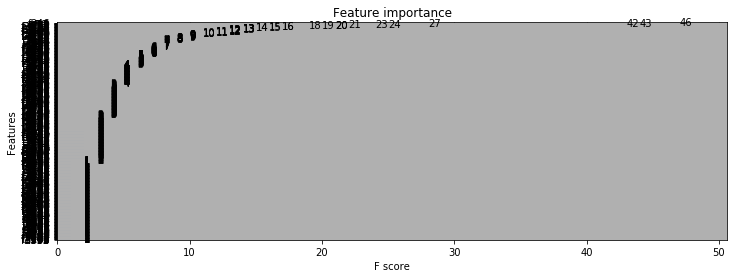

In [78]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgb)
pyplot.show()

In [230]:
euprior[mask].mean()

5.043249477402148

In [210]:
euprior = BES_Panel['euPriorityBalanceW13'].replace("Don't know", np.nan).cat.codes.replace(-1,np.nan)
mask = euprior.notnull()
weighted_mean = (euprior[mask] * BES_Panel['wt_new_W13'][mask]).mean()



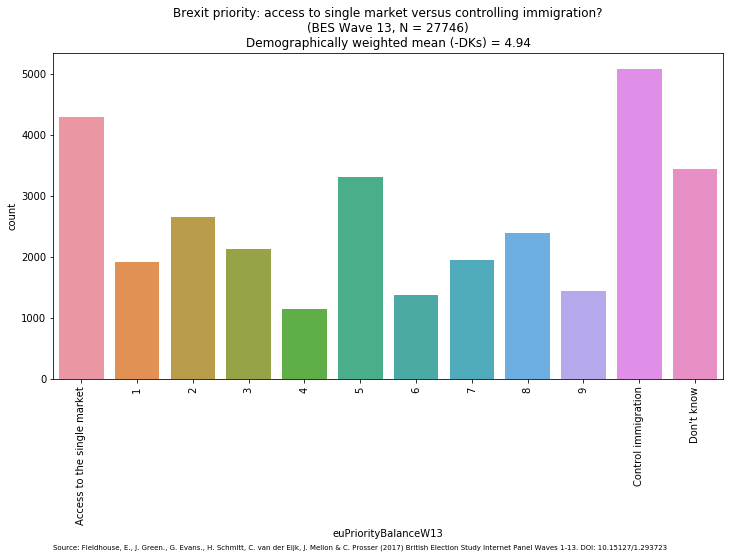

In [228]:
plt.figure(figsize=(12,6))
sns.countplot(BES_Panel['euPriorityBalanceW13']);
plt.xticks(rotation=90);
plt.title("Brexit priority: access to single market versus controlling immigration?\n(BES Wave 13, N = "+str(mask.sum()) +")\nDemographically weighted mean (-DKs) = "+str(round(weighted_mean,2)));
dataset_citation = "Source: " + manifest["Citation"].values[0]
plt.annotate(dataset_citation, (0,0), (0, -165),
                             xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
plt.savefig(BES_output_folder + "randomFunPlots" + os.sep + "single_market_vs_controlling_immigration" + ".png",bbox_inches='tight')

In [291]:
Leavers = BES_Panel["profile_eurefvote"] == "Leave the EU"
Remainers = BES_Panel["profile_eurefvote"] == "Stay/remain in the EU"

In [279]:
OneDropWhiteBritish = (BES_Panel[[x for x in BES_Panel.columns if "ethnicity" in x]]=="White British").any(axis=1)
OneDropWhiteBritish = BES_Panel["profile_ethnicity"]=="White British"

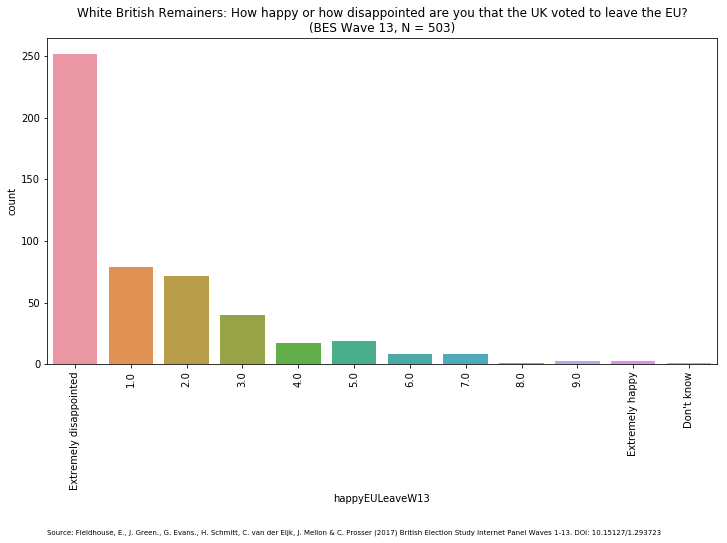

In [293]:
mask = (Remainers) & (OneDropWhiteBritish) & BES_Panel['happyEULeaveW13'].notnull()


plt.figure(figsize=(12,6))
plt.subplot(111)
sns.countplot(BES_Panel['happyEULeaveW13'][mask]);
plt.xticks(rotation=90);
plt.title("White British Remainers: How happy or how disappointed are you that the UK voted to leave the EU?\n(BES Wave 13, N = "+str(mask.sum()) +")");
dataset_citation = "Source: " + manifest["Citation"].values[0]
plt.annotate(dataset_citation, (0,0), (0, -165),
                             xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
plt.savefig(BES_output_folder + "randomFunPlots" + os.sep + "happyEULeave_Remainers_by_ethnicity_WB" + ".png",
            bbox_inches='tight')

In [ ]:
## save BES_numeric for R (missForest) imputation

In [ ]:
BES_export_to_R.to_stata(BES_R_data_files + filename + ".dta")

In [19]:
BES_numeric.shape

(68625, 4969)

In [20]:
BES_numeric.to_stata(BES_R_data_files + "BES_numeric" + ".dta")

In [41]:
BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if "__" in x]].to_stata(BES_R_data_files + "BES_numeric_non_cat_with_na" + ".dta")

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\pandas\io\stata.py:2121: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    b'turnoutUKGeneralW1__Very likely that I will vote'   ->   turnoutUKGeneralW1__Very_likely_
    b'turnoutUKGeneralW2__Very likely that I will vote'   ->   turnoutUKGeneralW2__Very_likely_
    b'turnoutUKGeneralW3__Very likely that I will vote'   ->   turnoutUKGeneralW3__Very_likely_
    b'turnoutUKGeneralW4__Very likely that I will vote'   ->   turnoutUKGeneralW4__Very_likely_
    b'turnoutUKGeneralW5__Very likely that I will vote'   ->   turnoutUKGeneralW5__Very_likely_
    b'turnoutUKGeneralW7__Very likely that I will vote'   ->   turnoutUKGeneralW7__Very_likely_
    b'turnoutUKGeneralW8__Very likely that I will vote'   ->   turnoutUKGeneralW8__Very_likely_
    b'turnoutUKGeneralW9__Very likely that I will vote'   ->   turnoutUKGeneralW9__Very_likely_
    

In [ ]:
## xgboost on different target!

In [90]:
BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if "tuition" in x]].notnull().sum()

tuitionFeesTooFarW6__Gone much too far     27088
tuitionFeesTooFarW13__Gone much too far    28122
dtype: int64

In [92]:
mask = BES_reduced["tuitionFeesTooFarW13__Gone much too far"].notnull()
target = BES_reduced["tuitionFeesTooFarW13__Gone much too far"][mask]
train = BES_reduced_with_na[mask].copy()

In [93]:
train = train.drop(train.columns[train.var()==0], axis=1)

In [95]:
train = train.drop("tuitionFeesTooFarW13__Gone much too far", axis=1)

In [97]:
%%time
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=test_size,
                                                    random_state=seed, stratify=target)


alg = XGBRegressor(
 learning_rate =0.04, #0.04
 n_estimators= 500,   #180,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 seed=27)

eval_set = [(X_test, y_test)]
alg.fit(X_train, y_train, eval_metric='rmse', n_jobs=4)
        #, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = alg.predict(X_test)
# predictions = [round(value) for value in y_pred]
predictions = y_pred
# evaluate predictions
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
EV = explained_variance_score(y_test, predictions)
R2 = r2_score(y_test, predictions)

print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )



MSE: 0.22, MAE: 0.24, EV: 0.40, R2: 0.40
Wall time: 19min 40s


In [100]:
shap_values = shap.TreeExplainer(alg).shap_values(train)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


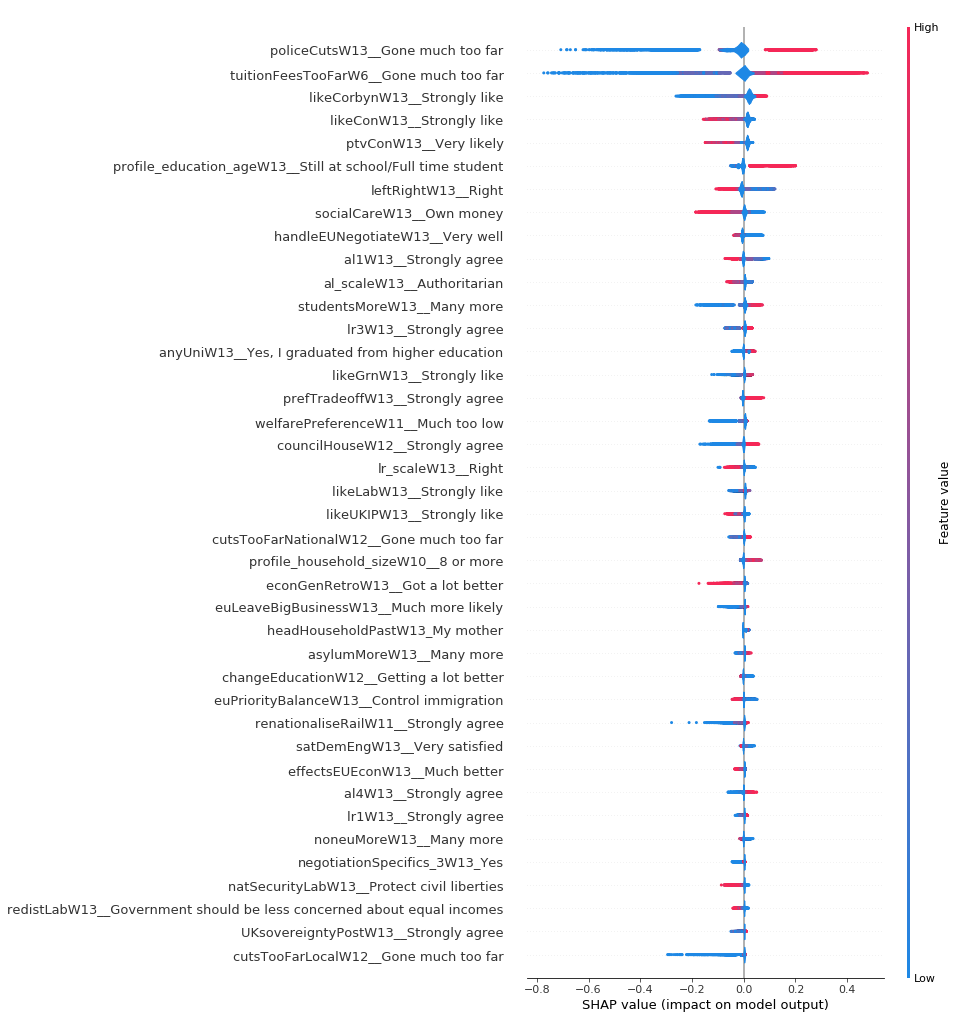

In [102]:
shap.summary_plot(shap_values, train, max_display=40, plot_type='violin')

In [108]:
global_shap_vals = np.abs(shap_values).mean(0)[:-1]
inds = np.argsort(global_shap_vals)
train.columns[inds]

Index(['partyContact1W2_Yes', 'profile_newspaperW13_The Mirror / Daily Record',
       'profile_newspaperW13_Other local daily morning newspaper',
       'profile_newspaperW13_The Independent',
       'profile_newspaperW13_The Herald (Glasgow)',
       'profile_newspaperW13_The Scotsman',
       'profile_newspaperW13_The Western Mail',
       'profile_ethnicity_Any other white background',
       'profile_ethnicity_Other ethnic group',
       'profile_ethnicity_Black African',
       ...
       'al1W13__Strongly agree', 'handleEUNegotiateW13__Very well',
       'socialCareW13__Own money', 'leftRightW13__Right',
       'profile_education_ageW13__Still at school/Full time student',
       'ptvConW13__Very likely', 'likeConW13__Strongly like',
       'likeCorbynW13__Strongly like',
       'tuitionFeesTooFarW6__Gone much too far',
       'policeCutsW13__Gone much too far'],
      dtype='object', length=2571)

In [103]:
gc.collect()

25861

In [127]:
np.abs(shap_values).mean(0)

array([1.8101929e-07, 0.0000000e+00, 5.3046856e-06, ..., 0.0000000e+00,
       0.0000000e+00, 2.9480600e+00], dtype=float32)

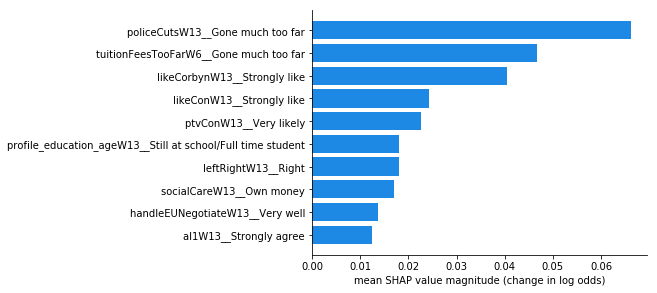

In [133]:
X=train
items = 10
global_shap_vals = np.abs(shap_values).mean(0)[:-1]
inds = np.argsort(global_shap_vals)[-items:]
# y_pos = np.arange(9)
y_pos = np.arange(items)
plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
plt.yticks(y_pos, X.columns[inds])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("mean SHAP value magnitude (change in log odds)")
plt.gcf().set_size_inches(6, 4.5)
plt.show()

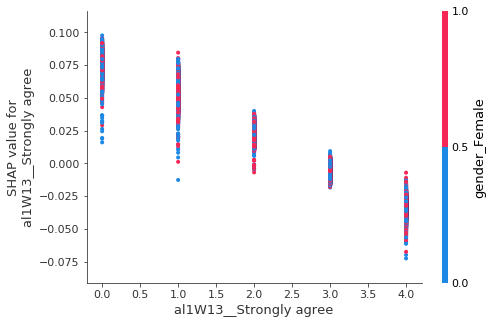

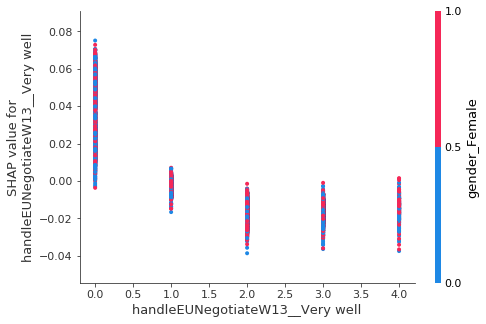

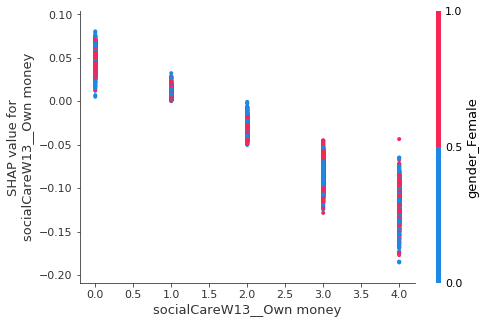

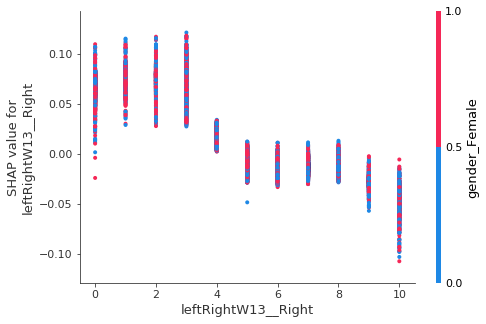

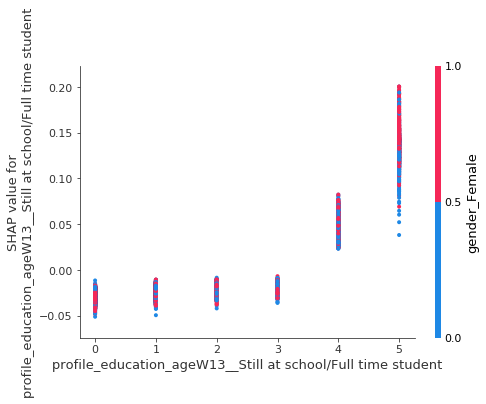

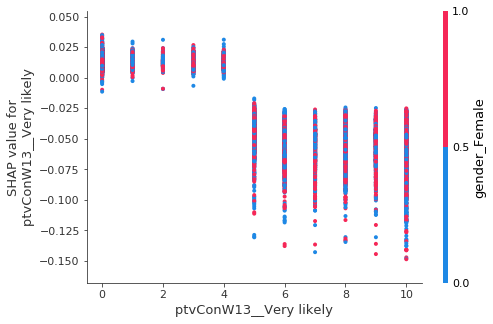

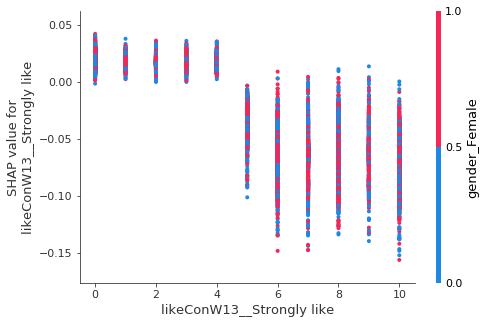

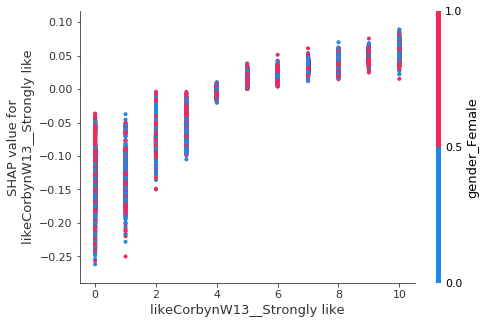

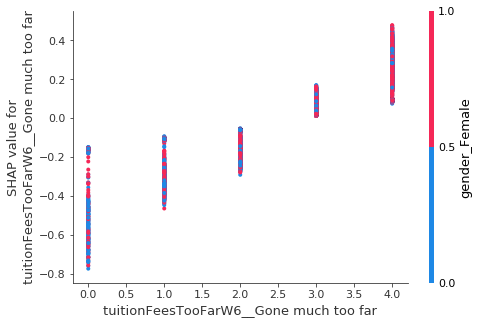

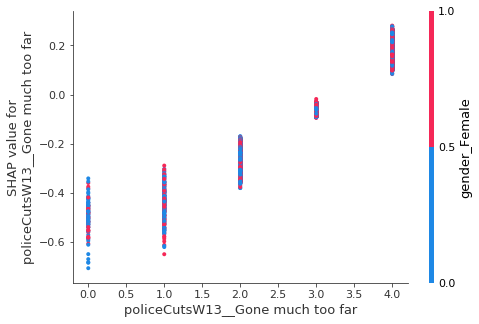

In [135]:
for name in X.columns[inds[::-1]]:
    shap.dependence_plot(name, shap_values, X)

In [137]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:-1])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:-1])

In [138]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

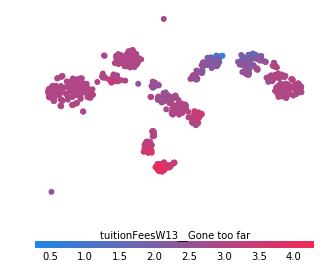

In [141]:
f = plt.figure(figsize=(5,5))
plt.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = plt.colorbar(label="tuitionFeesW13__Gone too far", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
plt.gca().axis("off")
plt.show()

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


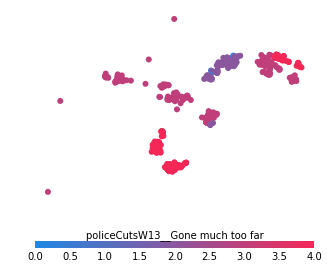

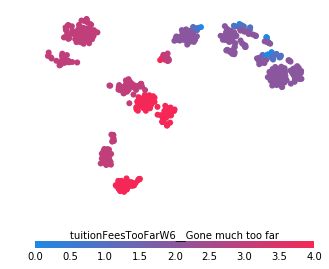

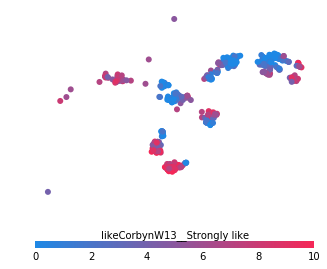

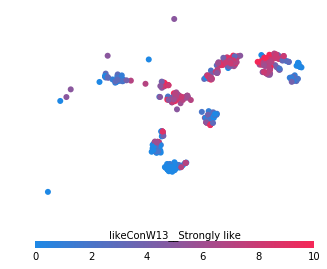

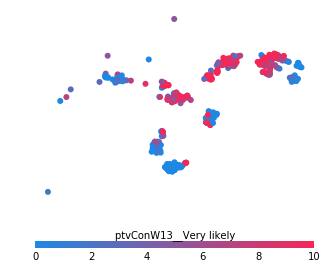

In [143]:
for feature in X.columns[inds[::-1]][0:5]:
    f = plt.figure(figsize=(5,5))
    plt.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].as_matrix()[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = plt.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    plt.gca().axis("off")
    plt.show()

Index(['policeCutsW13__Gone much too far',
       'tuitionFeesTooFarW6__Gone much too far',
       'likeCorbynW13__Strongly like', 'likeConW13__Strongly like',
       'ptvConW13__Very likely',
       'profile_education_ageW13__Still at school/Full time student',
       'leftRightW13__Right', 'socialCareW13__Own money',
       'handleEUNegotiateW13__Very well', 'al1W13__Strongly agree'],
      dtype='object')